In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def WOE(dim:tuple):
    '''
    Crea la matriz de Wishart 
    '''
    H = np.random.normal(0,1,dim)
    return np.matmul(H,H.T.conj()) / dim[0]

In [3]:
def WUE(dim:tuple):
    H = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    return np.matmul(H,H.T.conj())

In [4]:
def WSE(dim:tuple):
    A = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    B = np.random.normal(0,1,dim) + 1j * np.random.normal(0,1,dim)
    H = np.vstack((np.hstack((A,B)),
                   np.hstack((-B.conj(),A.conj()))))
    return np.matmul(H,H.T.conj())

In [22]:
N = 1000
T = 10000
WOEMat = WOE((N,T))

In [23]:
WOEMat.shape

(1000, 1000)

In [24]:
T>N

True

In [25]:
EvalsWOE = np.linalg.eigvalsh(WOEMat)

In [26]:
EvalsWOE==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

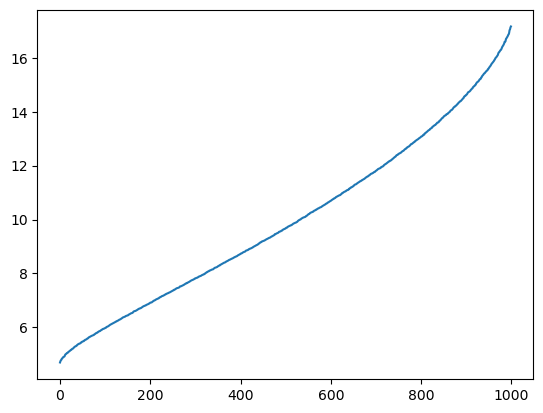

In [27]:
plt.figure()

plt.plot(EvalsWOE)

plt.show()

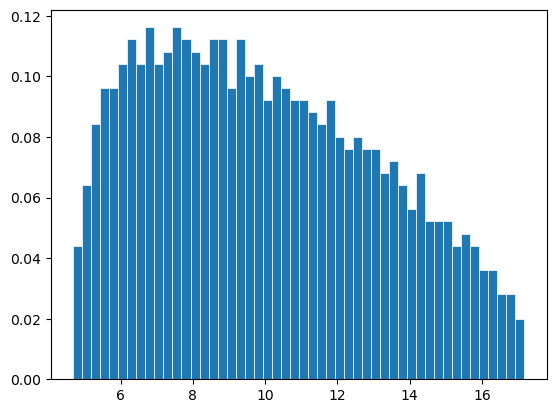

In [28]:
plt.figure()

plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")

plt.show()

In [29]:
EvalsWOENorm = EvalsWOE / EvalsWOE.max()

In [30]:
EvalsWOENorm.sum()

np.float64(582.6018933967734)

In [31]:
histEvlasWOE , binsWOE = np.histogram(EvalsWOENorm,bins=50)

In [32]:
histNormWOE = histEvlasWOE/T

In [33]:
histNormWOE.sum()

np.float64(0.1)

In [34]:
bin_centers = (binsWOE[:-1] + binsWOE[1:]) / 2

In [35]:
def marchpast(l, g):
    "Marchenko-Pastur distribución"
    def m0(a):
        "Maximo por elemento (a,0)"
        return np.maximum(a, np.zeros_like(a))
    gplus=(1+g**0.5)**2
    gminus=(1-g**0.5)**2
    return np.sqrt( m0(gplus  - l) *  m0(l- gminus)) / ( 2*np.pi*l)

In [36]:
x = np.linspace((1-(T/N)**0.5)**2,(1+(T/N)**0.5)**2,1000) 
plam = marchpast(x,T/N) 
#plam2 = Plam2(T,N,x)

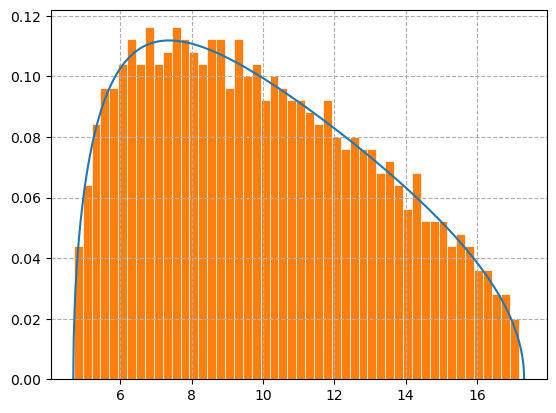

In [37]:
plt.figure()

plt.plot(x,plam)
plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()

In [38]:
50/100

0.5

In [39]:
r = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

In [40]:
def Pr(r):
    return (27/8) * (r+r**2) / (1+r+r**2)**(5/2)

In [41]:
def PrW(r):
    return (32*(1+r**2))/((2+r)**5)

In [42]:
rdom = np.linspace(0,8,1000)

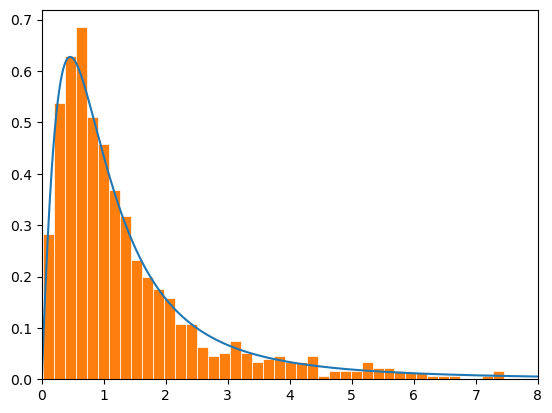

In [48]:
plt.figure()

plt.plot(rdom,Pr(rdom))
plt.hist(r,bins=200,density=True,linewidth=0.5, edgecolor="white")
plt.xlim(0,8)

plt.show()

In [49]:
MatWUE = WUE((N,T))

In [50]:
EvalsWUE = np.linalg.eigvalsh(MatWUE)

In [51]:
x = np.linspace((1-(T/N)**0.5)**2,(1+(T/N)**0.5)**2,1000) 
plam = marchpast(x,T/N) 

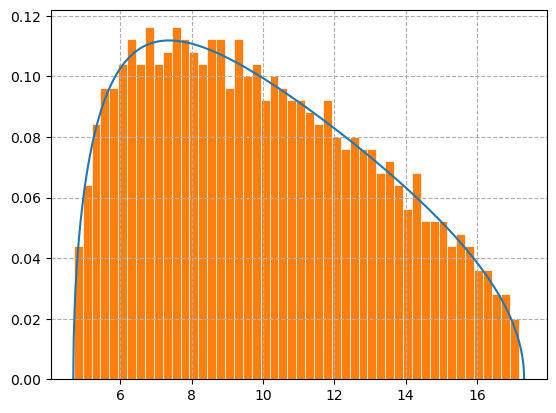

In [52]:
plt.figure()

plt.plot(x,plam)
plt.hist(EvalsWOE,bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()

In [53]:
def Pr2(r):
    return ((81* np.sqrt(3))/(4*np.pi)) * (r+r**2)**2 / (1+r+r**2)**4

In [54]:
r = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

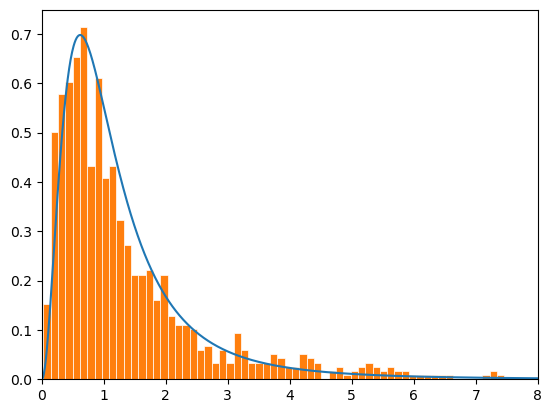

In [57]:
plt.figure()

plt.plot(rdom,Pr2(rdom))
plt.hist(r,bins=300,density=True,linewidth=0.5, edgecolor="white")
plt.xlim(0,8)

plt.show()

In [58]:
MatWSE = WSE((N,T))

In [59]:
EvalsWSE = np.linalg.eigvalsh(MatWSE)

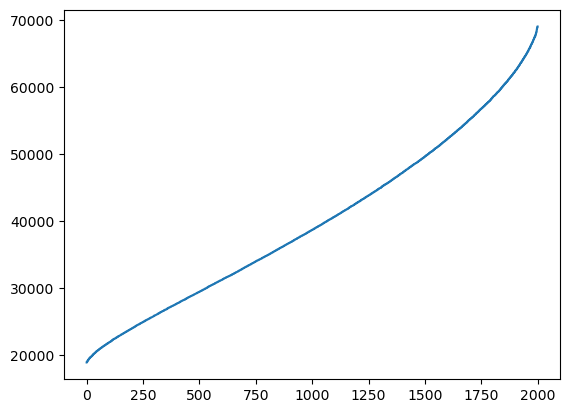

In [60]:
plt.figure()

plt.plot(EvalsWSE)

plt.show()

In [69]:
(EvalsWSE/80001869.37965775).sum()

np.float64(1.0)

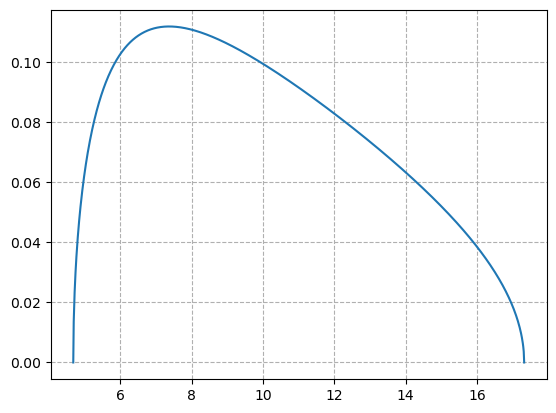

In [73]:
plt.figure()

plt.plot(x,plam)
#plt.hist((EvalsWSE/80001869.37965775)[::2],bins=50,density=True,linewidth=0.5, edgecolor="white")
plt.grid(True,linestyle='--')

plt.show()